In [1]:
import scipy.stats
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
norm = scipy.stats.norm(loc=-10.0, scale=1.0)

In [3]:
batch_size = 64
updates = 50000
#learning_rate = 0.01

In [4]:
gen_params = {'units':[10, 15, 10, 1], 'activation': [tf.nn.tanh, tf.nn.tanh, tf.nn.tanh]+[None]}
#gen_params = {'units':[5, 1], 'activation': [tf.nn.softplus]+[None]}

In [5]:
tf.reset_default_graph()

In [6]:
def generator(x):
    with tf.variable_scope('gen', reuse=tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer(uniform=False)
        net = tf.layers.dense(x, gen_params['units'][0], gen_params['activation'][0], 
                              kernel_initializer=init, bias_initializer=init)
        for un, act in zip(gen_params['units'][1:], gen_params['activation'][1:]):
            net = tf.layers.dense(net, un, act,kernel_initializer=init, bias_initializer=init)
        return net

In [7]:
x_input = tf.placeholder('float', [None, 1])
true_out = tf.placeholder('float', [None, 1])

In [8]:
out = generator(x_input)

In [9]:
loss = tf.losses.mean_squared_error(true_out, out)

In [10]:
optimizer = tf.train.AdamOptimizer()

In [11]:
net_opt = optimizer.minimize(loss)

In [12]:
def sample_input(size=batch_size):
    return np.random.uniform(low = 1e-18, high=1.0, size=[size, 1])

In [13]:
sess = tf.Session()

In [14]:
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
loss_val_list = []

In [16]:
for i in range(updates):
    input_sample = sample_input()
    true_sample = norm.ppf(input_sample)
    loss_val, _ = sess.run((loss, net_opt), feed_dict={x_input: input_sample, true_out: true_sample})
    loss_val_list.append(loss_val)

In [17]:
test_input = sample_input(1000)

In [18]:
out_data = out.eval(feed_dict={x_input: test_input}, session=sess)

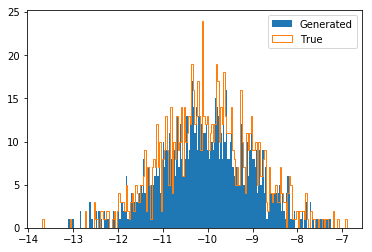

In [19]:
plt.hist(out_data, 200, label='Generated');
plt.hist(norm.ppf(test_input), 200, histtype='step', label='True');
plt.legend()

In [20]:
x_s = np.linspace(1e-18,1.0-1e-18,1000)

In [21]:
temp = out.eval(feed_dict={x_input: x_s.reshape(1000,1)}, session=sess)

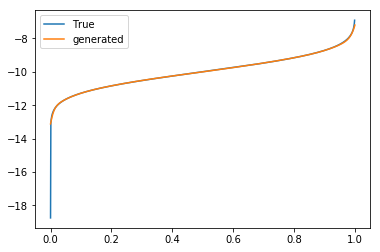

In [22]:
plt.plot(x_s, norm.ppf(x_s), label='True')
plt.plot(x_s, temp, label='generated')
plt.legend()

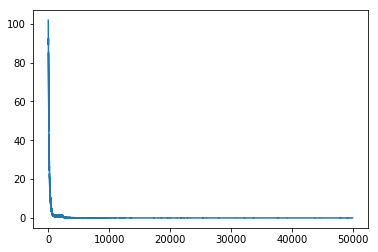

In [23]:
plt.plot(loss_val_list)